<a href="https://colab.research.google.com/github/CarSandoval/Grafos/blob/main/FloydWarshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo de Floyd-Warshall

El algoritmo de Floyd-Warshall es un algoritmo de análisis de gráficos para encontrar los caminos más cortos en un grafo dirigido ponderado con pesos de arista positivos o negativos (pero sin ciclos negativos). Una sola ejecución del algoritmo encontrará las distancias de camino más cortas entre todos los pares de vértices.

### Principio de funcionamiento

El algoritmo se basa en la programación dinámica. Considera todos los pares posibles de caminos a través del grafo entre cada par de vértices `(i, j)`. Luego, considera todos los vértices posibles `k` que podrían ser un punto intermedio en un camino de `i` a `j`. Para cada par `(i, j)`, el algoritmo compara la distancia actual entre `i` y `j` con la distancia obtenida al pasar por el vértice `k` (`dist(i, k) + dist(k, j)`). Si la distancia pasando por `k` es menor, actualiza la distancia entre `i` y `j`. Este proceso se repite para todos los vértices `k`.



In [1]:
%pip install networkx matplotlib

Grafo 1:


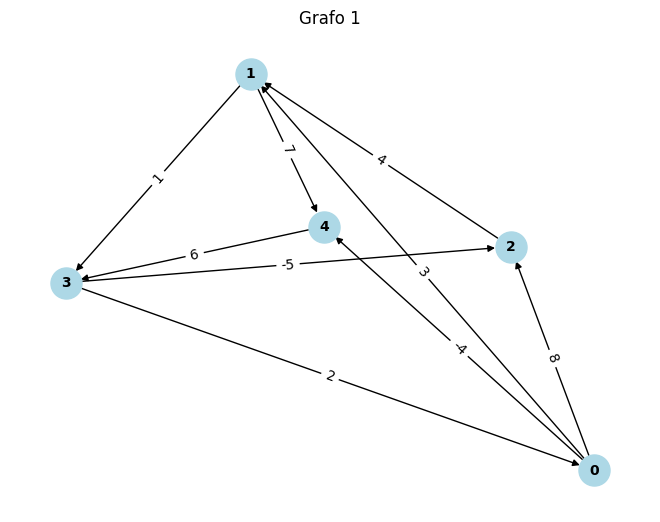


Matriz de distancias más cortas para el Grafo 1:
0 1 2 4 3
0 1 -3 -4 2
3 0 -4 -1 1
7 4 0 3 5
8 5 1 0 6
2 -1 -5 -2 0

Grafo 2:


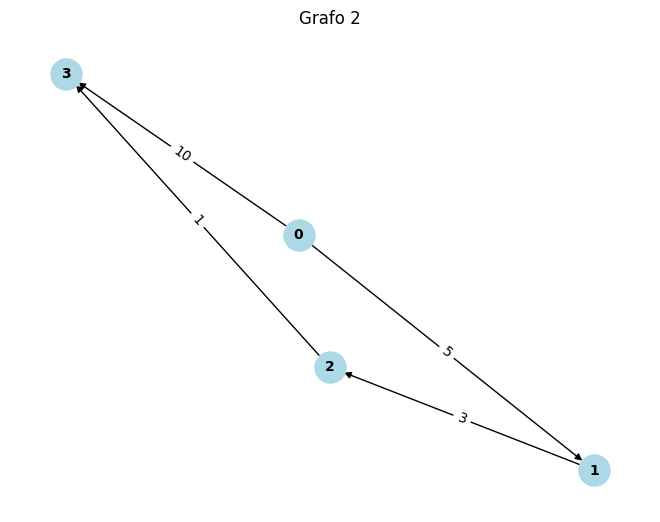


Matriz de distancias más cortas para el Grafo 2:
0 1 3 2
0 5 9 8
inf 0 4 3
inf inf 0 inf
inf inf 1 0


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

def floyd_warshall_nx(graph):
    """
    Implementa el algoritmo de Floyd-Warshall utilizando NetworkX.

    Args:
        graph: Un objeto de grafo NetworkX.

    Returns:
        Una matriz dist que contiene las distancias más cortas entre todos los pares de vértices.
        Retorna None si se detecta un ciclo negativo.
    """
    # Obtener los nodos y el número de nodos
    nodes = list(graph.nodes())
    V = len(nodes)
    # Crear un diccionario para mapear nodos a índices
    node_to_index = {node: i for i, node in enumerate(nodes)}

    # Inicializar la matriz de distancias con infinito
    dist = [[sys.maxsize for _ in range(V)] for _ in range(V)]

    # Inicializar las distancias directas desde las aristas del grafo
    for u, v, data in graph.edges(data=True):
        i, j = node_to_index[u], node_to_index[v]
        dist[i][j] = data.get('weight', 1)  # Usar el peso de la arista si existe, de lo contrario 1

    # La distancia de un nodo a sí mismo es 0
    for i in range(V):
        dist[i][i] = 0

    # Algoritmo de Floyd-Warshall
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i][k] != sys.maxsize and dist[k][j] != sys.maxsize and dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    # Detectar ciclos negativos
    for i in range(V):
        if dist[i][i] < 0:
            print("El grafo contiene un ciclo negativo.")
            return None

    return dist, nodes # Retorna la matriz de distancias y la lista de nodos


def draw_graph(graph, title="Grafo"):
    """
    Dibuja un grafo NetworkX con etiquetas de peso.
    """
    pos = nx.spring_layout(graph)  # Posiciones para todos los nodos
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

# Ejemplo de uso con el primer grafo:
G1 = nx.DiGraph()
G1.add_edge(0, 1, weight=3)
G1.add_edge(0, 2, weight=8)
G1.add_edge(0, 4, weight=-4)
G1.add_edge(1, 4, weight=7)
G1.add_edge(1, 3, weight=1)
G1.add_edge(2, 1, weight=4)
G1.add_edge(3, 0, weight=2)
G1.add_edge(3, 2, weight=-5)
G1.add_edge(4, 3, weight=6)

print("Grafo 1:")
draw_graph(G1, title="Grafo 1")

shortest_distances1, nodes1 = floyd_warshall_nx(G1)

if shortest_distances1:
    print("\nMatriz de distancias más cortas para el Grafo 1:")
    # Imprimir encabezado con nodos
    print(" ".join([str(node) for node in nodes1]))
    # Imprimir la matriz con los nodos
    for i, row in enumerate(shortest_distances1):
        print(" ".join([str(val) if val != sys.maxsize else "inf" for val in row]))


# Ejemplo de uso con el segundo grafo:
G2 = nx.DiGraph()
G2.add_edge(0, 1, weight=5)
G2.add_edge(0, 3, weight=10)
G2.add_edge(1, 2, weight=3)
G2.add_edge(2, 3, weight=1)

print("\nGrafo 2:")
draw_graph(G2, title="Grafo 2")

shortest_distances2, nodes2 = floyd_warshall_nx(G2)

if shortest_distances2:
    print("\nMatriz de distancias más cortas para el Grafo 2:")
    # Imprimir encabezado con nodos
    print(" ".join([str(node) for node in nodes2]))
    # Imprimir la matriz con los nodos
    for i, row in enumerate(shortest_distances2):
        print(" ".join([str(val) if val != sys.maxsize else "inf" for val in row]))